## Crédit à la Consommation (Home Credit)

Énoncé du problème :

Home Credit recherche des motifs dans ses données concernant le risque de défaut des prêts à la consommation. Menez une analyse pour faire ressortir les motifs notables liés au risque de défaut.


Our goal is to analyze this dataset and explore for notable patterns regarding the default risk of consumer loans.  As was done for Option 1, we will follow the given process:

1. Look at the complete dataset and identify an approach.
1. Clean the data with rationale-backed handling of null or missing values.
1. Join the datasets together into a single dataframe.
1. Analyze default risk results.

This dataset is considerably more complicated than the Grocery Sales dataset; it is taken from [a Kaggle competition](https://www.kaggle.com/c/home-credit-default-risk/data), which provides the following diagram to explain its contents:
<img src='./Kaggle - Home Credit Schema.png'>

We are also provided with a definition of every column in every dataset, and an example submission file for Kaggle.

Of the three datasets, this is the most involved.  There are many potential connections, and the initial train/test datasets are the most complete of any on offer.

So, my strategy here will be slightly different.  I will first import a portion of the large, complete dataset (`application_train.csv`), then explore the potential for expanding it to add detail or answer new questions.


### 1. Look At The Data!

By printing the first few columns of each dataset, we can see how they might be combined to open up opportunities for analysis.  To do this, we need to import libraries, load the datasets into variables, and print their heads.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# display plots in the Jupyter notebook
#%matplotlib inline

# import the training dataset (you may have to change the directory/file names)
# note the encoding option to deal with a read error!
application_train = pd.read_csv('./Home Credit Data/application_train.csv', encoding = 'ISO-8859-1', engine='python')

# as an example, print the shape first rows of sales using the head() method
print('Shape: ', application_train.shape, '\n')
application_train.head(5)

Shape:  (307511, 122) 



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


As expected, this is already a much larger dataset than the others; `application_train.csv` contains 307511 rows, each one describing a separate loan.  To describe those loans, the dataset contains 122 features.  One such feature is `TARGET`, the label that the Kaggle project description asks its competitors to predict.

Because we are provided with the label to be predicted, that machine learning task would be described as a "supervised learning" problem.  If you would like to extend this problem, applying a supervised learning algorithm to learn to classify loan risk would be an interesting possibility.  For now, though, such a thing is out of scope; our aims are to visualize the existing dataset and derive some trends or hypotheses.



## 2. Clean The Data!

I will go through a few potential issues with the dataset, as examples for how students might identify and address problems.

### Dataset Balance

Because it is a labeled dataset, we should check if the dataset is *balanced*; that is, if the proportions of the dataset with each label are roughly equal in size.

In [2]:
# check if the dataset is balanced
print(application_train['TARGET'].value_counts())

0    282686
1     24825
Name: TARGET, dtype: int64


The dataset is **unbalanced**.  While this may not be an enormous issue for the purpose of this exploratory data analysis, it would be something to consider if training a machine learning model; a skewed dataset can skew what the model learns.

### Missing Values

Let's determine the number and proportion of missing values in each column of this dataset.

In [3]:
# calculate the number and percent of null values, by column
number_missing = application_train.isnull().sum()
percent_missing = application_train.isnull().sum() * 100 / len(application_train)

# create a dataframe to summarize this information
missing_values = pd.DataFrame({'# Missing' : number_missing,
                               '% Missing': percent_missing})

# drop rows where there are no missing values and sort, descending
missing_values = missing_values[missing_values['# Missing'] > 0] 
missing_values.sort_values('% Missing', ascending = False).round(2)

,# Missing,% Missing
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35


There are a total of **67** features with missing information, and many are missing the majority of their data.  This has some implications:

1. If we were to build a machine learning model based on this dataset, we would have to *impute* these values (fill them in via some method) or choose an approach that handles missing values well.

2. Practically, we may decide that columns with a high proportion of missing values are not useful and may be dropped, but it is difficult to know this in advance of building a model.

So, for now, we will keep them, unaltered.  Skimming over them, we should have enough full columns to perform our exploratory data analysis.

### Datatypes

We should make sure we understand the data types present here.  Integer and float values are easy to manipulate, but objects are harder to interpret; they may be strings or categorical variables.

First, we will look at the number of columns with each data type, and then explore the unique objects more directly.

In [4]:
# print the number of columns with each datatype
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [5]:
# print the number of unique entries in each object column
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Most of these features have a relatively small number of categories, which makes them a bit easier to interpret.  These may not be especially useful for our exploratory data analysis, but determining a way to handle such categorical variables is important for any analysis that involves them.

Two common ways to handle categorical variables are:

1. **Label encoding**, which assigns an integer value to each unique category.  No new columns are created, but some machine learning algorithms have difficulty accounting for the apparent difference in magnitude.  If "engineer" is assigned a label of "1" and "firefighter" is assigned a label of "4", we don't mean that firefighters are 4 times as valuable as engineers!

1. **One-hot encoding**, which creates a new column for each unique category and assigns a 1 or 0 in a given row depending on which category it belongs to.  This creates many new columns, but is easier for some algorithms to learn from.


### Erroneous Data

When exploring a dataset, it is important to reveal any anomalies (typos, measuring errors, or extreme outliers).  The simplest way to examine a dataset for such values is the `describe()` method.

Let's check the `DAYS_EMPLOYED` column, for example.

In [6]:
# describe the DAYS_EMPLOYED column
application_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5,0,'Days Employed')

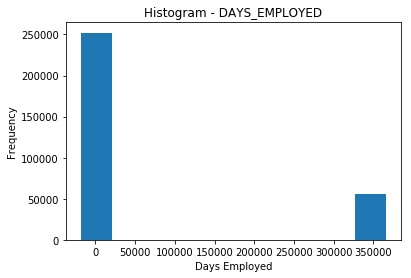

In [7]:
# print a histogram of days employed
application_train['DAYS_EMPLOYED'].plot.hist(title = 'Histogram - DAYS_EMPLOYED')
plt.xlabel('Days Employed')

We must now decide how to handle these anomalous values.  If they still contain useful information about default risk, we would want to keep them for our model.  My approach will be:

1. Compare the default risk between the normal-looking population and the anomalous population.

2. If they are different, on average, then replace the erroneous `DAYS_EMPLOYED` value with np.nan and  make a flag in a new column to indicate that the entry was an anomaly.

In [8]:
# compare the anomalous and non-anomalous populations
anomalies = application_train[application_train['DAYS_EMPLOYED'] >= 300000]
normies = application_train[application_train['DAYS_EMPLOYED'] < 300000]
print('Default Rate (anomalies) = ', anomalies['TARGET'].mean())
print('Default Rate (non-anomalies) = ', normies['TARGET'].mean())

Default Rate (anomalies) =  0.05399646043269404
Default Rate (non-anomalies) =  0.0865997453765215


The anomalous population defaults on 5.4% of loans, which is notably lower than the 8.7% rate of default for the non-anomalous population!

So, we'll replace the values with np.nan, create a new column to flag anomalies, and plot another histogram to check that our imputation was successful.

Text(0.5,0,'Days Employed')

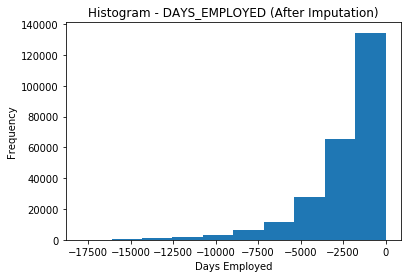

In [9]:
# create a new column to flag anomalous rows
application_train['DAYS_EMPLOYED_ANOMALY'] = application_train['DAYS_EMPLOYED'] == 365243

# for anomalous rows, replace `DAYS_EMPLOYED` with np.nan
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# plot a new histogram to check for correct imputation
application_train['DAYS_EMPLOYED'].plot.hist(title = 'Histogram - DAYS_EMPLOYED (After Imputation)')
plt.xlabel('Days Employed')

Having made the above changes, the histogram looks more like wha we would expect!


## 3. Initial Analyses (Pre-Joining)

Because this dataset is already so well-constructed, we may not need to add any new features through joining.  Let's look at the existing feature set first, then do a sample join with one dataset.

### Correlations

When working with a dataset with this many features, it is helpful to get a sense of how significant variables are with respect to the target.  One way of describing this significance is through Pearson correlation coefficients, which can be calculated in Pandas using the `.corr()` method.

As a rule, Pearson correlation coefficients of greater than 0.60 indicate "strong" correlations.

In [10]:
# calculate, sort, and print Pearson correlation coefficients
correlations = application_train.corr()['TARGET'].sort_values(ascending = False)

# print the top 10 and bottom 10 correlations
print('10 MOST POSITIVE CORRELATIONS: \n', correlations.head(10), '\n')
print('10 MOST NEGATIVE CORRELATIONS: \n', correlations.tail(10), '\n')

10 MOST POSITIVE CORRELATIONS: 
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
Name: TARGET, dtype: float64 

10 MOST NEGATIVE CORRELATIONS: 
 ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED_ANOMALY        -0.045987
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64 



From this, we can draw some basic hypotheses about credit default risk, such as:

1. `DAYS_BIRTH` (which is recorded as the current date minus the birth date, so older people will have more negative values) has a positive correlation with `TARGET`, which is their credit default risk.  So, older people are LESS likely to default on loans.

2. `DAYS_EMPLOYED` has a similar relationship; those who have been employed for longer are less likely to default on loans.

For example, let's focus on `DAYS_BIRTH` and make a histogram of default risk by age.

In [11]:
# pull `TARGET` and `DAYS_BIRTH` into a new dataframe
ages = application_train.loc[:, ['DAYS_BIRTH', 'TARGET']]

# make a new column to calculate years of age
# take the absolute value of `DAYS_BIRTH` so ages aren't negative
# use np.floor to round ages down to the nearest year
ages['AGE_IN_YEARS'] = np.floor(abs(ages['DAYS_BIRTH']) / 365)

# create "age bins" so we can group by them and plot a histogram
# min = 20, max = 70, with 11 segments to create 5-year increments
bin_parameters = np.linspace(20, 80, 11)
ages['AGE_GROUPS'] = pd.cut(ages['AGE_IN_YEARS'], bins = bin_parameters)

# print the head of the dataframe to confirm proper construction
ages.head(5)

,DAYS_BIRTH,TARGET,AGE_IN_YEARS,AGE_GROUPS
0,-9461,1,25.0,"(20.0, 26.0]"
1,-16765,0,45.0,"(44.0, 50.0]"
2,-19046,0,52.0,"(50.0, 56.0]"
3,-19005,0,52.0,"(50.0, 56.0]"
4,-19932,0,54.0,"(50.0, 56.0]"


In [12]:
# plot a histogram of age groups and default risk
age_group_risk = ages.groupby('AGE_GROUPS').mean()

Text(0.5,1,'Default Rate By Age Group')

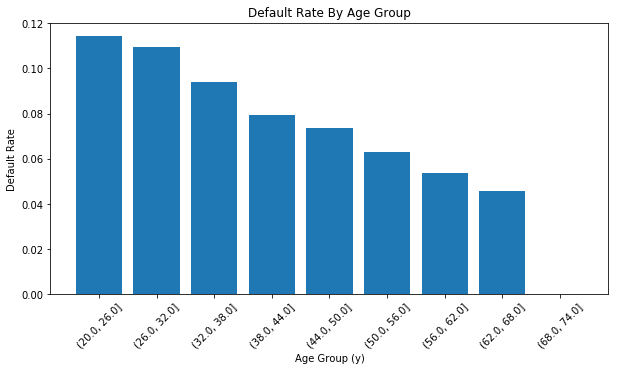

In [13]:
# plot default rate by age group
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(age_group_risk.index.astype(str), age_group_risk['TARGET'])
plt.ylabel('Default Rate')
plt.xlabel('Age Group (y)')
plt.xticks(rotation = 45)
plt.title('Default Rate By Age Group')

This trend illustrates the reason for `DAYS_BIRTH` being the feature with the strongest Pearson correlation coefficient; **default rate declines as a function of age**.


## 4. Joining Datasets

Referring to the dataset diagram provided by Kaggle, let's join the `bureau` dataset to `application_train` to add information about prior loans.

In [14]:
# import the bureau dataset (you may have to change the directory/file names)
# note the encoding option to deal with a read error!
bureau = pd.read_csv('./Home Credit Data/bureau.csv', encoding = 'ISO-8859-1', engine='python')

# as an example, print the shape first rows of sales using the head() method
print('Shape: ', bureau.shape, '\n')
bureau.head(5)

Shape:  (1716428, 17) 



,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


Now that we have bureau data, we can use `groupby()` to group by ID (`SK_ID_CURR`) and count the number of previous loans.  For clarity, let's rename the column, too.

In [15]:
# group by client ID (`SK_ID_CURR`)
previous_loans = bureau.groupby('SK_ID_CURR', as_index = False)['SK_ID_BUREAU'].count()

# rename the column, for clarity
previous_loans = previous_loans.rename(columns = {'SK_ID_BUREAU': 'previous_loans'})

# print the head to check proper construction
previous_loans.head()

,SK_ID_CURR,previous_loans
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC57ECCC88>]],
      dtype=object)

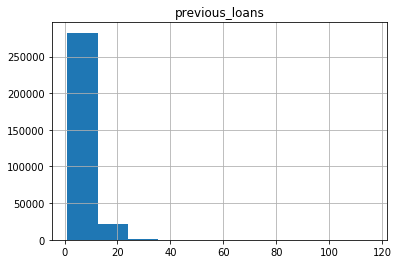

In [16]:
# produce a histogram of `previous_loans` to check the distribution
previous_loans.hist(column = 'previous_loans')

In [17]:
# check for nulls
previous_loans['previous_loans'].isnull().sum()

0

There are no nulls!

Let's join this with the `application_train` dataframe.

In [18]:
# create a new dataframe by merging `application_train` and `bureau`
train_merged = application_train.merge(previous_loans, how = 'left', on = 'SK_ID_CURR')

# print the head to confirm a successful merge
train_merged.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOMALY,previous_loans
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,8.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,4.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,1.0


## 5. Further analyses

Now that we have added a new feature, let's assess its usefulness in the way we did before:

1. Check the correlation coefficient of the new feature with `TARGET`.

1. Make a bar chart of the new feature against default risk.

In [19]:
# calculate Pearson correlation coefficients
correlations = train_merged.corr()['TARGET'].sort_values(ascending = False)

# print the correlation coefficient of the new feature
print('r-value of `previous_loans`: ', correlations['previous_loans'])

r-value of `previous_loans`:  0.0040560913193856424


In [20]:
train_merged['previous_loans'].describe()

count    263491.000000
mean          5.561196
std           4.377897
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max         116.000000
Name: previous_loans, dtype: float64

Text(0.5,1,'Default Rate By Prior Loan Count')

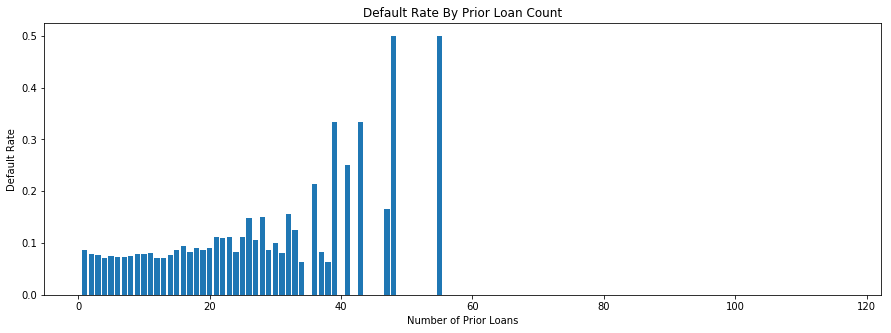

In [21]:
# group by prior loans and find the mean default risk
grouped_priors = train_merged.groupby('previous_loans', as_index = False)['TARGET'].mean()

# plot default rate by age group
fig, ax = plt.subplots(figsize=(15, 5))
plt.bar(grouped_priors['previous_loans'], grouped_priors['TARGET'])
plt.ylabel('Default Rate')
plt.xlabel('Number of Prior Loans')
plt.title('Default Rate By Prior Loan Count')

#### Conclusions:

1. The new variable (`previous_loans`) from the joined dataset is not strongly correlated with the `TARGET` variable, credit default rate.

1. The new variable trend appears exponential, but noisy; we have relatively few data points with a prior loan count of more than 30, but that appears to be the breaking point.  Large spikes in default rate after that are volatile data points, given that small sample size.

1. The original dataset is probably sufficient for an initial model.  If the scope of this project included model development, it would be advisable to construct an initial machine learning model, select a set of features by importance, and then add features from other datasets in an attempt to improve model fidelity.

A sample extension could be:

1. Import the `application_train` dataset.
1. Perform some initial machine learning modeling using the full feature set (logistic regression, for example).
1. Perform principal component analysis (PCA) on the full feature set to create a smaller set of new features that capture the majority of the variance in the target variable.
1. Re-run the model from step 2 on the reduced feature set.
1. Compare the fidelity of the reduced model to the original model.
1. If successful, examine the principal components to see what original features comprise them, and attempt to explain each component.  Perhaps one would include information relating to major possessions (car loans, education loans), and another would include information relating to assessed home value (number of rooms, floor area).